<a href="https://colab.research.google.com/github/faruk17035/Deep-Learning-Models/blob/main/Google_Stock_Price_Prediction_using_LSTM_08_10_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data = pd.read_csv('/content/gdrive/MyDrive/GOOG.csv', date_parser = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-08,1465.089966,1490.000000,1465.089966,1485.930054,1485.930054,1187800
1,2020-10-09,1494.699951,1516.520020,1489.449951,1515.219971,1515.219971,1435300
2,2020-10-12,1543.000000,1593.859985,1532.569946,1569.150024,1569.150024,2482600
3,2020-10-13,1583.729980,1590.000000,1563.199951,1571.680054,1571.680054,1601000
4,2020-10-14,1578.589966,1587.683960,1550.530029,1568.079956,1568.079956,1929300


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2021-10-01,2671.090088,2741.419922,2667.550049,2729.250000,2729.250000,1419400
248,2021-10-04,2713.989990,2714.000000,2623.330078,2675.300049,2675.300049,1576500
249,2021-10-05,2680.000000,2747.239990,2680.000000,2723.540039,2723.540039,1206300
250,2021-10-06,2692.510010,2757.040039,2689.729980,2747.080078,2747.080078,988200
251,2021-10-07,2777.260010,2803.089111,2771.260010,2783.709961,2783.709961,911500


In [16]:
data_training = data[data['Date']<'2021-08-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-08,1465.089966,1490.000000,1465.089966,1485.930054,1485.930054,1187800
1,2020-10-09,1494.699951,1516.520020,1489.449951,1515.219971,1515.219971,1435300
2,2020-10-12,1543.000000,1593.859985,1532.569946,1569.150024,1569.150024,2482600
3,2020-10-13,1583.729980,1590.000000,1563.199951,1571.680054,1571.680054,1601000
4,2020-10-14,1578.589966,1587.683960,1550.530029,1568.079956,1568.079956,1929300
...,...,...,...,...,...,...,...
199,2021-07-26,2765.000000,2794.260010,2753.020020,2792.889893,2792.889893,1152600
200,2021-07-27,2800.219971,2800.219971,2702.000000,2735.929932,2735.929932,2108200
201,2021-07-28,2771.239990,2793.520020,2727.000000,2727.629883,2727.629883,2734400
202,2021-07-29,2727.612061,2743.030029,2722.760010,2730.810059,2730.810059,964200


In [17]:
data_test = data[data['Date']>='2021-08-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
204,2021-08-02,2709.689941,2720.409912,2693.389893,2719.790039,2719.790039,1007000
205,2021-08-03,2720.000000,2726.709961,2683.669922,2725.600098,2725.600098,953200
206,2021-08-04,2724.989990,2730.760010,2708.300049,2720.570068,2720.570068,826400
207,2021-08-05,2720.570068,2739.000000,2712.000000,2738.800049,2738.800049,593300
208,2021-08-06,2725.899902,2741.601074,2720.929932,2740.719971,2740.719971,678000
209,2021-08-09,2738.979980,2766.429932,2728.574951,2760.040039,2760.040039,618700
210,2021-08-10,2761.590088,2771.030029,2744.530029,2761.929932,2761.929932,801700
211,2021-08-11,2765.659912,2776.955078,2747.000000,2753.790039,2753.790039,760200
212,2021-08-12,2754.260010,2768.360107,2735.580078,2767.790039,2767.790039,732300
213,2021-08-13,2767.149902,2773.479980,2760.100098,2768.120117,2768.120117,628600


In [18]:
training_data = data_training.drop(['Date','Adj Close'], axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,1465.089966,1490.000000,1465.089966,1485.930054,1187800
1,1494.699951,1516.520020,1489.449951,1515.219971,1435300
2,1543.000000,1593.859985,1532.569946,1569.150024,2482600
3,1583.729980,1590.000000,1563.199951,1571.680054,1601000
4,1578.589966,1587.683960,1550.530029,1568.079956,1929300


In [19]:
scalar = MinMaxScaler()
training_data = scalar.fit_transform(training_data)
training_data

array([[0.        , 0.        , 0.        , 0.        , 0.21118449],
       [0.0221776 , 0.02024089, 0.01891406, 0.02241072, 0.27333451],
       [0.05835389, 0.07926912, 0.05239413, 0.06367447, 0.53632323],
       ...,
       [0.97829426, 0.99488639, 0.97979702, 0.95006732, 0.59955302],
       [0.94561735, 0.95635089, 0.97650493, 0.95250058, 0.15503603],
       [0.93259083, 0.93528341, 0.95594785, 0.93230858, 0.21339427]])

In [20]:
training_data.shape[0]

204

In [22]:
X_train=[]
y_train=[]

In [23]:
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  y_train.append(training_data[i,0])

In [24]:
X_train

[array([[0.        , 0.        , 0.        , 0.        , 0.21118449],
        [0.0221776 , 0.02024089, 0.01891406, 0.02241072, 0.27333451],
        [0.05835389, 0.07926912, 0.05239413, 0.06367447, 0.53632323],
        [0.08886027, 0.07632306, 0.07617649, 0.06561028, 0.31494363],
        [0.08501045, 0.07455539, 0.06633906, 0.06285572, 0.39738342],
        [0.06146222, 0.06495473, 0.06206864, 0.0560078 , 0.29962584],
        [0.07546831, 0.06955321, 0.07602124, 0.06662787, 0.27318384],
        [0.08641106, 0.0749111 , 0.04884585, 0.03724669, 0.3164754 ],
        [0.04640753, 0.06678268, 0.04703678, 0.05355941, 0.47583055],
        [0.08107075, 0.09825066, 0.08272191, 0.08216014, 0.55784346],
        [0.09584092, 0.1007388 , 0.09310291, 0.09900832, 0.27290762],
        [0.12057251, 0.11628581, 0.12067429, 0.11864936, 0.25839339],
        [0.11977863, 0.1131413 , 0.08650317, 0.07997177, 0.37829897],
        [0.09780327, 0.08917966, 0.09137923, 0.09053833, 0.22153027],
        [0.07089199,

In [25]:
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(144, 60, 5)
(144,)


## Building LSTM

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [29]:
X_train.shape[1], 5

(60, 5)

In [33]:
regressor = Sequential()

regressor.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (X_train.shape[1],5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation='relu', return_sequences = True))
regressor.add(Dropout(0.3))


In [34]:
regressor.add(LSTM(units = 80, activation='relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation='relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))


In [35]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [36]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
5/5 [==============================] - 11s 690ms/step - loss: 0.3356
Epoch 2/10
5/5 [==============================] - 3s 663ms/step - loss: 0.1148
Epoch 3/10
5/5 [==============================] - 3s 680ms/step - loss: 0.0495
Epoch 4/10
5/5 [==============================] - 3s 651ms/step - loss: 0.0567
Epoch 5/10
5/5 [==============================] - 3s 675ms/step - loss: 0.0244
Epoch 6/10
5/5 [==============================] - 3s 695ms/step - loss: 0.0312
Epoch 7/10
5/5 [==============================] - 3s 687ms/step - loss: 0.0254
Epoch 8/10
5/5 [==============================] - 3s 688ms/step - loss: 0.0273
Epoch 9/10
5/5 [==============================] - 4s 702ms/step - loss: 0.0212
Epoch 10/10
5/5 [==============================] - 4s 720ms/step - loss: 0.0229


## Prepare test dataset

In [37]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
204,2021-08-02,2709.689941,2720.409912,2693.389893,2719.790039,2719.790039,1007000
205,2021-08-03,2720.000000,2726.709961,2683.669922,2725.600098,2725.600098,953200
206,2021-08-04,2724.989990,2730.760010,2708.300049,2720.570068,2720.570068,826400
207,2021-08-05,2720.570068,2739.000000,2712.000000,2738.800049,2738.800049,593300
208,2021-08-06,2725.899902,2741.601074,2720.929932,2740.719971,2740.719971,678000


In [38]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
144,2021-05-06,2350.639893,2382.709961,2342.337891,2381.350098,2381.350098,1030900
145,2021-05-07,2400.000000,2416.409912,2390.000000,2398.689941,2398.689941,1163600
146,2021-05-10,2374.889893,2378.000000,2334.729980,2341.659912,2341.659912,1300300
147,2021-05-11,2291.860107,2322.000000,2283.000000,2308.760010,2308.760010,1605500
148,2021-05-12,2261.709961,2285.370117,2230.050049,2239.080078,2239.080078,1746700
149,2021-05-13,2261.090088,2276.601074,2242.719971,2261.969971,2261.969971,1333500
150,2021-05-14,2291.830078,2321.139893,2283.320068,2316.159912,2316.159912,1331200
151,2021-05-17,2309.320068,2323.340088,2295.000000,2321.409912,2321.409912,992100
152,2021-05-18,2336.906006,2343.149902,2303.159912,2303.429932,2303.429932,865100
153,2021-05-19,2264.399902,2316.760010,2263.520020,2308.709961,2308.709961,967500


In [39]:
past_60_days = data_training.tail(60)

In [40]:
df = past_60_days.append(data_test, ignore_index=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-06,2350.639893,2382.709961,2342.337891,2381.350098,2381.350098,1030900
1,2021-05-07,2400.000000,2416.409912,2390.000000,2398.689941,2398.689941,1163600
2,2021-05-10,2374.889893,2378.000000,2334.729980,2341.659912,2341.659912,1300300
3,2021-05-11,2291.860107,2322.000000,2283.000000,2308.760010,2308.760010,1605500
4,2021-05-12,2261.709961,2285.370117,2230.050049,2239.080078,2239.080078,1746700
...,...,...,...,...,...,...,...
103,2021-10-01,2671.090088,2741.419922,2667.550049,2729.250000,2729.250000,1419400
104,2021-10-04,2713.989990,2714.000000,2623.330078,2675.300049,2675.300049,1576500
105,2021-10-05,2680.000000,2747.239990,2680.000000,2723.540039,2723.540039,1206300
106,2021-10-06,2692.510010,2757.040039,2689.729980,2747.080078,2747.080078,988200


In [41]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,2350.639893,2382.709961,2342.337891,2381.350098,1030900
1,2400.000000,2416.409912,2390.000000,2398.689941,1163600
2,2374.889893,2378.000000,2334.729980,2341.659912,1300300
3,2291.860107,2322.000000,2283.000000,2308.760010,1605500
4,2261.709961,2285.370117,2230.050049,2239.080078,1746700


In [42]:
inputs = scalar.transform(df)
inputs

array([[0.66326869, 0.68134358, 0.6811301 , 0.68511672, 0.17178515],
       [0.70023895, 0.70706441, 0.71813685, 0.69838404, 0.2051076 ],
       [0.68143171, 0.67774879, 0.67522301, 0.6547484 , 0.2394345 ],
       [0.61924317, 0.63500788, 0.63505781, 0.62957555, 0.31607363],
       [0.59666099, 0.60705083, 0.59394536, 0.57626103, 0.35153052],
       [0.59619671, 0.60035802, 0.60378279, 0.59377488, 0.24777139],
       [0.61922068, 0.63435142, 0.63530632, 0.63523747, 0.24719383],
       [0.63232052, 0.63603067, 0.64437508, 0.63925442, 0.16204204],
       [0.65298213, 0.65115013, 0.65071076, 0.62549732, 0.13015092],
       [0.59867573, 0.63100855, 0.61993278, 0.62953725, 0.1558647 ],
       [0.64634161, 0.6642702 , 0.66463246, 0.66578942, 0.21213871],
       [0.67476577, 0.67087971, 0.68115512, 0.6573806 , 0.19958316],
       [0.67552226, 0.70864435, 0.69492915, 0.70448979, 0.17964493],
       [0.71521877, 0.71964244, 0.7282228 , 0.70632623, 0.14943626],
       [0.70985222, 0.72731611, 0.

In [43]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i,0])

In [44]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((48, 60, 5), (48,))

In [45]:
y_pred = regressor.predict(X_test)
y_pred

array([[0.7264603 ],
       [0.7315784 ],
       [0.73695093],
       [0.74245155],
       [0.74794596],
       [0.753325  ],
       [0.75850457],
       [0.763436  ],
       [0.76810545],
       [0.77249557],
       [0.77660406],
       [0.78043276],
       [0.784013  ],
       [0.7873379 ],
       [0.79040074],
       [0.79319847],
       [0.795784  ],
       [0.79826546],
       [0.8007306 ],
       [0.80326426],
       [0.8059656 ],
       [0.8089125 ],
       [0.81222063],
       [0.8159365 ],
       [0.8200844 ],
       [0.8246203 ],
       [0.82949585],
       [0.8346329 ],
       [0.8399391 ],
       [0.8453639 ],
       [0.8508202 ],
       [0.8562106 ],
       [0.86150265],
       [0.86663145],
       [0.87166303],
       [0.8765301 ],
       [0.88110435],
       [0.885307  ],
       [0.88907206],
       [0.892343  ],
       [0.89510286],
       [0.8973507 ],
       [0.8990393 ],
       [0.9001261 ],
       [0.90056115],
       [0.90032214],
       [0.899407  ],
       [0.897

In [46]:
scalar.scale_

array([7.48990732e-04, 7.63230619e-04, 7.76439681e-04, 7.65134452e-04,
       2.51111167e-07])

In [47]:
scale = 1/7.48990732e-04
scale

1335.1300053202795

In [48]:
y_pred = y_pred*scale
y_test = y_test*scale

## Visualization

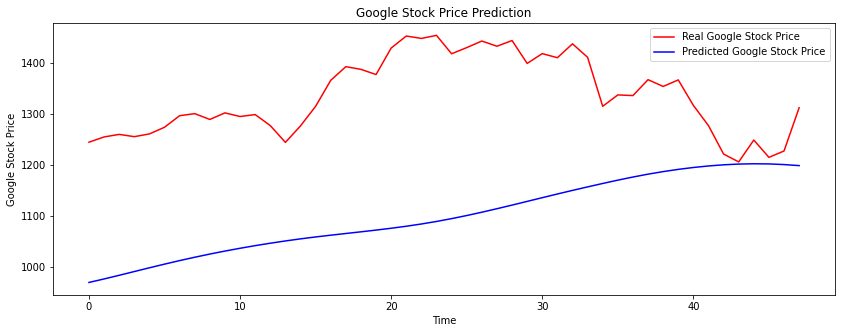

In [49]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color='red', label='Real Google Stock Price')
plt.plot(y_pred, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()